In [8]:
import nltk
import numpy as np
nltk.download("cess_esp")
from nltk.corpus import cess_esp as cess

[nltk_data] Downloading package cess_esp to
[nltk_data]     C:\Users\Alberto\AppData\Roaming\nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [19]:
tagged_sentences = []
for sent in cess.tagged_sents():
    tagged_sent = []
    for word in sent:
        tag = word[1]
        if tag[0] not in ['v', 'f', 'V', 'F']:
            tag = tag[:2]
        elif tag[:2] == 'sn' and word[0] == "*0*":
            continue
        else:
            tag = tag[:3]
        tagged_sent.append((word[0], tag))
    tagged_sentences.append(tagged_sent)

In [22]:
from random import shuffle
from sklearn.model_selection import KFold
from nltk.tag import hmm, tnt

hmm_acc = []
tnt_acc = []
    
kf = KFold(10)
for train_index, test_index in kf.split(tagged_sentences):
    training_sents = [tagged_sentences[i] for i in train_index]
    test_sents = [tagged_sentences[i] for i in test_index]

    tagger_hmm=hmm.HiddenMarkovModelTagger.train(training_sents)
    hmm_acc.append(tagger_hmm.accuracy(test_sents))

    tagger_tnt= tnt.TnT()
    tagger_tnt.train(training_sents)
    tnt_acc.append(tagger_tnt.accuracy(test_sents))

print(hmm_acc)
print(tnt_acc)

[0.9302101576182137, 0.9267685744756488, 0.9249848497965544, 0.9277964181445815, 0.9262966333030027, 0.887008175779254, 0.8922758620689655, 0.8929549560048948, 0.8968024114900408, 0.8895248998282771]
[0.8980735551663748, 0.8908638464273018, 0.8886676478226994, 0.8923700379101486, 0.8951860999176741, 0.8444685743484925, 0.8622758620689656, 0.8521065205990327, 0.862639635912288, 0.8334287349742415]


In [28]:
hmm_acc_2 = []
tnt_acc_2 = []
    
kf = KFold(10, shuffle=True)
for train_index, test_index in kf.split(tagged_sentences):
    training_sents = [tagged_sentences[i] for i in train_index]
    test_sents = [tagged_sentences[i] for i in test_index]

    tagger_hmm=hmm.HiddenMarkovModelTagger.train(training_sents)
    hmm_acc_2.append(tagger_hmm.accuracy(test_sents))

    tagger_tnt= tnt.TnT()
    tagger_tnt.train(training_sents)
    tnt_acc_2.append(tagger_tnt.accuracy(test_sents))

print(hmm_acc_2)
print(tnt_acc_2)

[0.9257552483358935, 0.9313766670166964, 0.930825854593123, 0.9296352823535603, 0.9275414937759336, 0.9292570951585977, 0.932232524221273, 0.9320116309807032, 0.9248585479350643, 0.9261728021006919]
[0.9019969278033794, 0.9055969757429382, 0.905364525562166, 0.9053207725909163, 0.9, 0.904580550918197, 0.9074903635795395, 0.906000528680941, 0.902014700438898, 0.9018835529970206]


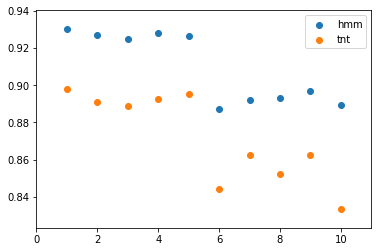

In [27]:
from cProfile import label
import matplotlib.pyplot as plt

plt.scatter([i for i in range(1,11)], hmm_acc, label="hmm")
plt.scatter([i for i in range(1,11)], tnt_acc, label="tnt")
plt.axis([0, 11, min(tnt_acc)-0.01, max(hmm_acc)+0.01])
plt.legend(loc="upper right")
plt.show()

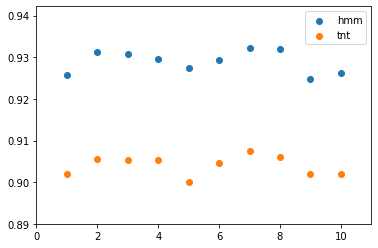

In [29]:
plt.scatter([i for i in range(1,11)], hmm_acc_2, label="hmm")
plt.scatter([i for i in range(1,11)], tnt_acc_2, label="tnt")
plt.axis([0, 11, min(tnt_acc_2)-0.01, max(hmm_acc_2)+0.01])
plt.legend(loc="upper right")
plt.show()